In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys
sys.path.append('../../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=False)

from sklearn.datasets import make_classification

# Computation Complexity Comparison

In [7]:
data_set_names = []
n_samples_arr = np.array([500, 1000, 1500, 2000, 2500])
n_classes_arr = np.array([2, 4, 6])

for n_classes in n_classes_arr:
    for n_samples in n_samples_arr:
        X, y = make_classification(n_samples=n_samples+1, n_classes=n_classes, n_informative=10, n_features=10,
                                   n_redundant=0, random_state=42)
        data_dict = {'x_'+str(d): X[:, d] for d in range(np.size(X, axis=1))}
        data_dict['y'] = y
        data_df = pd.DataFrame(data_dict)
        data_set_name = 'toy_nsamples={}_nclasses={}'.format(n_samples, n_classes)
        data_df.to_csv('../../data/{}.csv'.format(data_set_name), index=False)
        data_set_names.append(data_set_name)

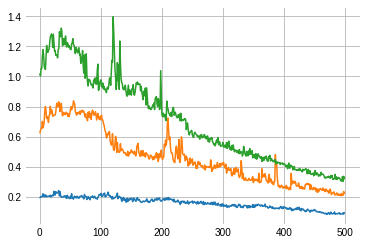

In [8]:
strategy_names = ['random', 'lc', 'pal-1', 'qbc', 'alce', 'zero-one-loss', 'xpal-0.001']
data_dfs = {}
for s in strategy_names:
    data_dfs[s] = {}
    for d in data_set_names:
        df = pd.read_csv('../../results/performances_{}_{}_1_rbf_mean_all_42.csv'.format(d, s))
        if s == 'zero-one-loss' and '=1000' in d:
            df = pd.read_csv('../../results/performances_{}_{}_1_rbf_mean_500_42.csv'.format(d, s))
            plt.plot(df['time'].values[1:])
        data_dfs[s][d] = np.mean(df['time'].values[1:200])
plt.show()



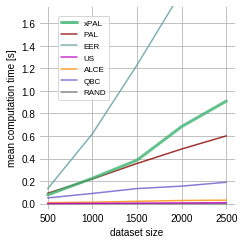

In [10]:
query_strategy_dict = {
                        'random': ['dimgrey', 1.5, 'RAND'],
                        'qbc': ['slateblue', 1.5, 'QBC'],
                        'alce': ['darkorange', 1.5, 'ALCE'],
                        'lc': ['m', 1.5, 'US'],
                        'zero-one-loss': ['cadetblue', 1.5, 'EER'],
                        'pal-1': ['darkred', 1.5, 'PAL'],
                        'xpal-0.001': ['mediumseagreen', 3, r'xPAL'],
                      }
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5))
for idx_s, s in enumerate(reversed(list(query_strategy_dict.keys()))):
    times = []
    for n_classes in n_classes_arr:
        times.append([])
        for d in data_set_names:
            if 'nclasses={}'.format(n_classes) in d:
                times[-1].append(data_dfs[s][d])

    ax.plot(n_samples_arr, np.mean(times, axis=0), color=query_strategy_dict[s][0],
            label=query_strategy_dict[s][2], lw=query_strategy_dict[s][1],
            zorder=-idx_s+10, alpha=0.8)

ax.set_xlabel('dataset size', color='black')
ax.set_ylabel('mean computation time [s]', color='black')
ax.set_ylim(-0.05, 1.75)
fig.legend(fontsize=8, bbox_to_anchor=(0.45, 0.92))
fig.tight_layout()
fig.savefig('../../images/complexity.pdf')